# HR Analysis Classification

#### Q1.How does Attrition affect companies?
#### Q2.how does HR Analytics help in analyzing attrition?
#### NOTE: A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. 

In [1]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [2]:
hr = pd.read_csv(r'HREmployeeAttrition.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr.shape

(1470, 35)

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#data statistics
hr.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
#Attrition
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

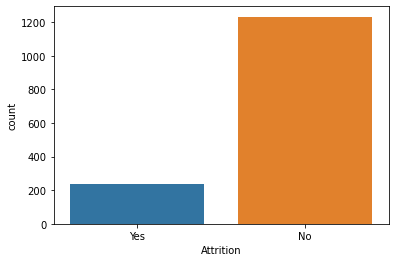

In [9]:
#visualizing the attrition
sns.countplot(x='Attrition',data=hr)

In [10]:
#let us explore the columns
hr['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

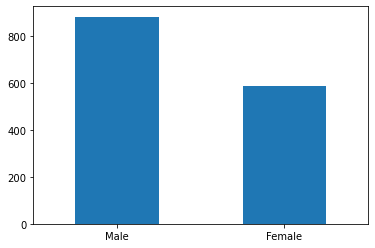

In [11]:
# visualizing the gender values 
hr['Gender'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

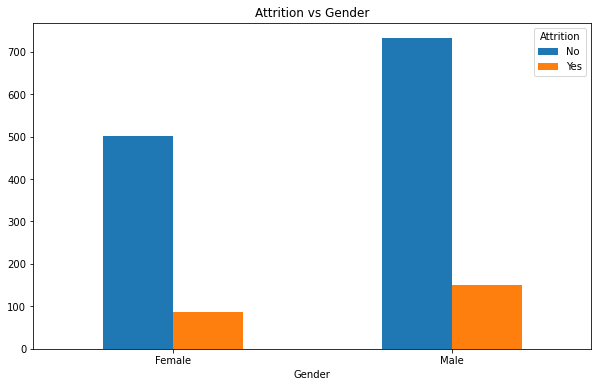

In [12]:
#Crosstab Gender Vs Attrition
pd.crosstab(hr['Gender'],hr['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xticks(rotation=0)

In [13]:
# BusinessTravel
hr['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Travel_Rarely'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Non-Travel')])

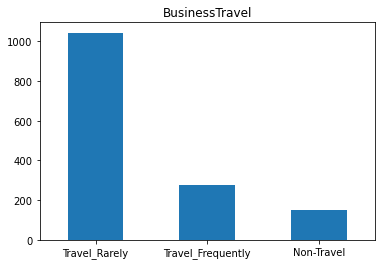

In [14]:
#BusinessTravel
hr['BusinessTravel'].value_counts().plot(kind='bar',title = 'BusinessTravel')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Non-Travel'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Travel_Rarely')])

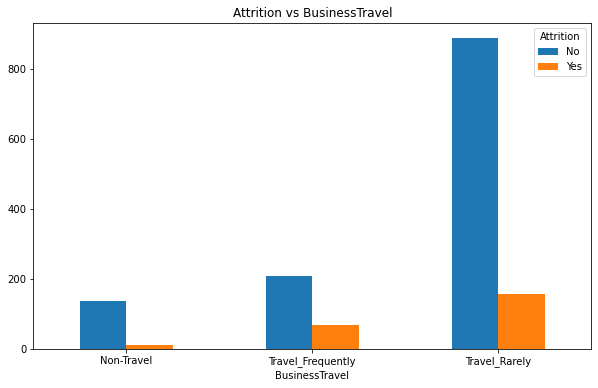

In [15]:
#crosstab for BusinessTravel VS Attrition
pd.crosstab(hr['BusinessTravel'],hr['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs BusinessTravel")
plt.xticks(rotation=0)

In [16]:
#Department 
hr['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Research & Development'),
  Text(1, 0, 'Sales'),
  Text(2, 0, 'Human Resources')])

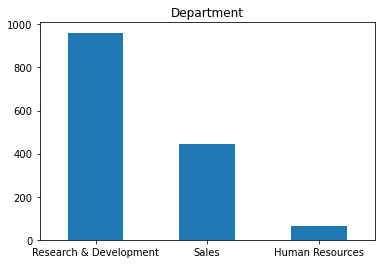

In [17]:
hr['Department'].value_counts().plot(kind='bar',title='Department')
plt.xticks(rotation=0)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

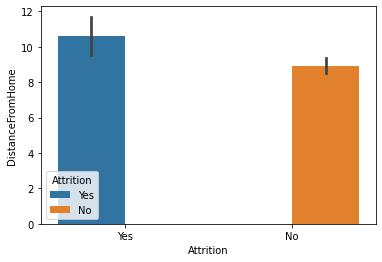

In [18]:
#DistanceFromHome
#hr['DisatanceFromHome']
sns.barplot(x='Attrition',y='DistanceFromHome',data= hr,hue = 'Attrition')

In [19]:
#EducationField
hr['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Life Sciences'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Medical'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Technical Degree')])

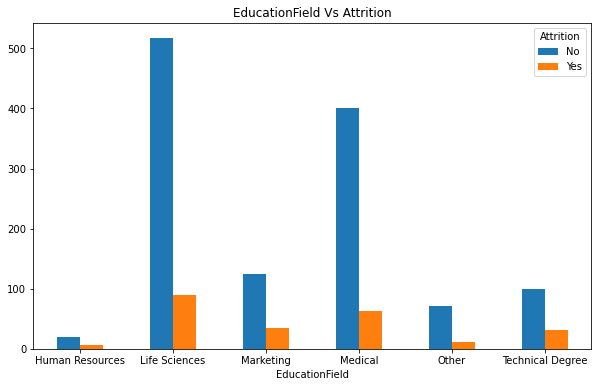

In [20]:
#EducationField Vs Attrition
pd.crosstab(hr['EducationField'],hr['Attrition']).plot(kind='bar',figsize=(10,6))
plt.title("EducationField Vs Attrition")
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

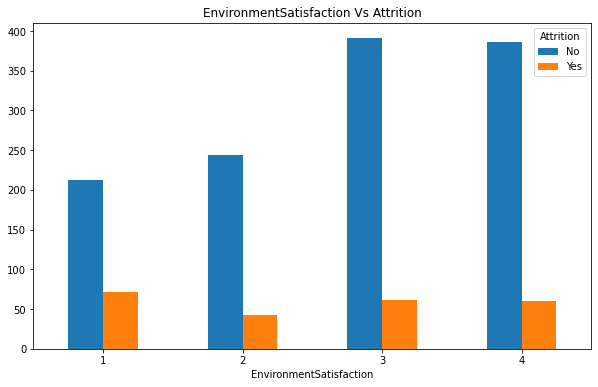

In [21]:
#EnvironmentSatisfaction Vs Attrition
pd.crosstab(hr['EnvironmentSatisfaction'],hr['Attrition']).plot(kind='bar',figsize=(10,6))
plt.title("EnvironmentSatisfaction Vs Attrition")
plt.xticks(rotation=0)

In [22]:
#HourlyRate
hr['HourlyRate'].value_counts()

66    29
42    28
98    28
84    28
48    28
      ..
69    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

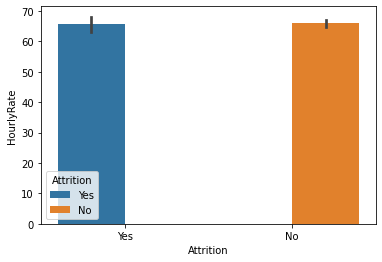

In [23]:
#crosstab for HourlyRate Vs Attrition
sns.barplot(x='Attrition',y='HourlyRate',hue='Attrition',data=hr)
plt.xticks(rotation=0)

In [24]:
#JobInvolvement
hr['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

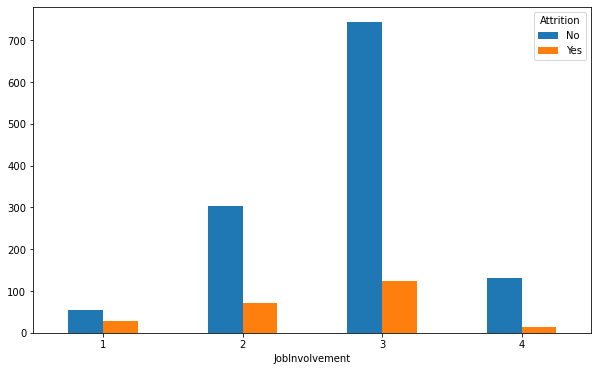

In [25]:
#JobInvolvement Vs Attrition
pd.crosstab(hr['JobInvolvement'],hr['Attrition']).plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0)

In [26]:
#JobLevel
hr['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

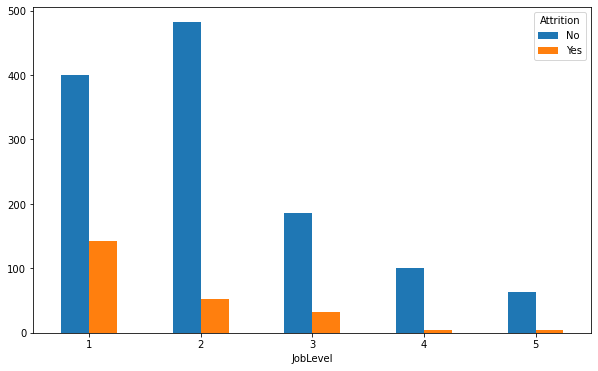

In [27]:
#JobLevel Vs Attrition
pd.crosstab(hr['JobLevel'],hr['Attrition']).plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0)

In [28]:
#JobRole
hr['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

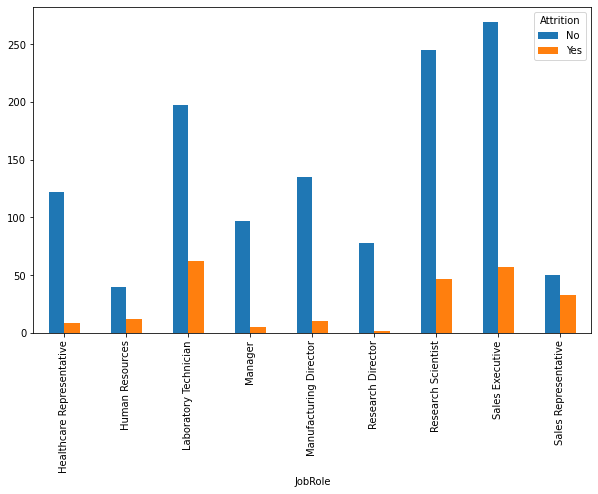

In [29]:
#JobLevel Vs Attrition
pd.crosstab(hr['JobRole'],hr['Attrition']).plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=90)

In [30]:
#JobSatisfaction
hr['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

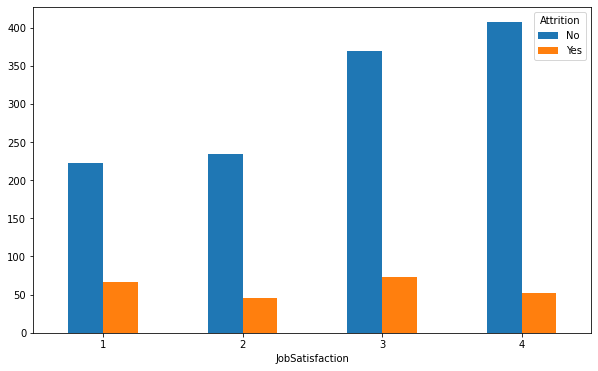

In [31]:
#JobSatisfaction Vs Attrition
pd.crosstab(hr['JobSatisfaction'],hr['Attrition']).plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0)

In [32]:
#MaritalStatus
hr['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

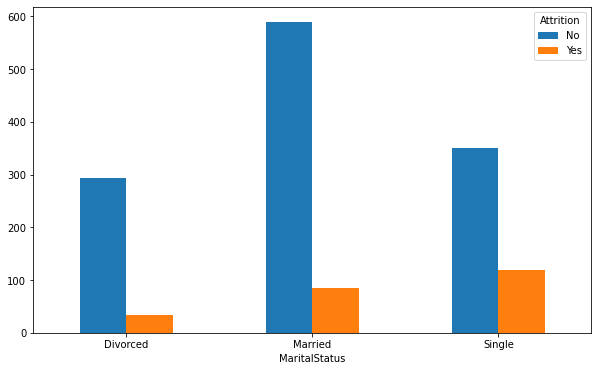

In [33]:
#JobSatisfaction Vs Attrition
pd.crosstab(hr['MaritalStatus'],hr['Attrition']).plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0)

In [34]:
#MonthlyIncome
hr['MonthlyIncome'].value_counts()

2342     4
6142     3
2610     3
2559     3
6347     3
        ..
4103     1
2705     1
6796     1
19717    1
10239    1
Name: MonthlyIncome, Length: 1349, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

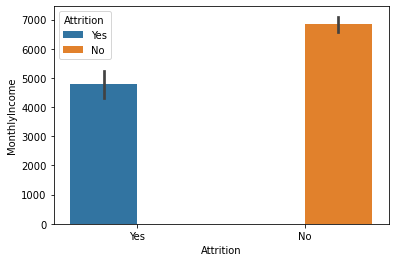

In [35]:
#MonthlyIncome Vs Attrition
sns.barplot(x='Attrition',y='MonthlyIncome',data=hr,hue='Attrition')

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

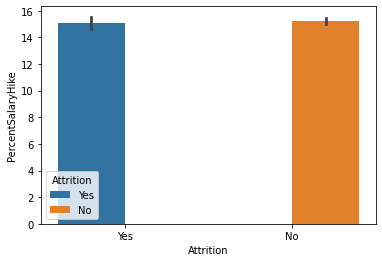

In [36]:
#PercentSalaryHike 
sns.barplot(x='Attrition',y='PercentSalaryHike',hue ='Attrition',data=hr)


<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

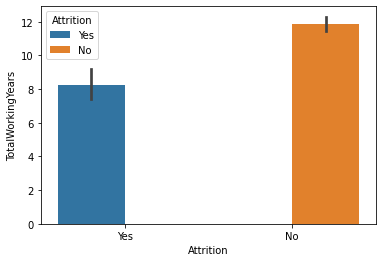

In [37]:
#TotalWorkingYears 
sns.barplot(x='Attrition',y='TotalWorkingYears',hue='Attrition',data=hr)


<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

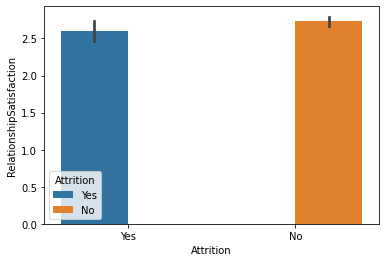

In [38]:
#RelationshipSatisfaction
sns.barplot(x='Attrition',y='RelationshipSatisfaction',hue='Attrition',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='StandardHours'>

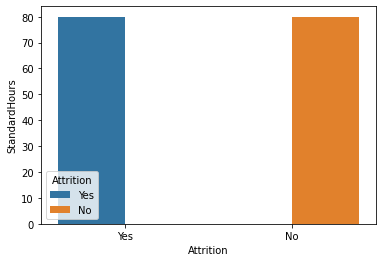

In [39]:
#StandardHours
sns.barplot(x='Attrition',y='StandardHours',hue='Attrition',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

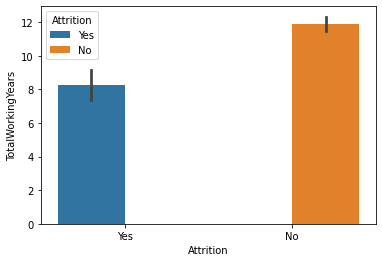

In [40]:
#TotalWorkingYears
sns.barplot(x='Attrition',y='TotalWorkingYears',hue='Attrition',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

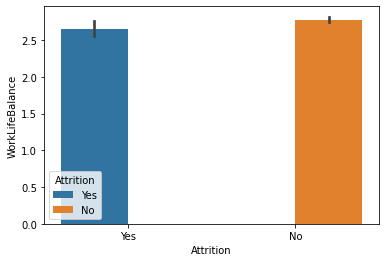

In [41]:
#WorkLifeBalance
sns.barplot(x='Attrition',y='WorkLifeBalance',hue='Attrition',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

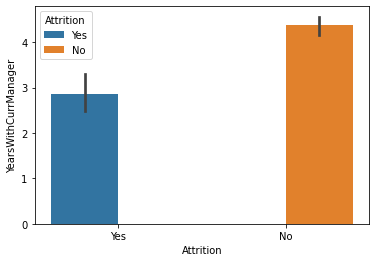

In [42]:
#YearsAtCompany
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue='Attrition',data=hr)      

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

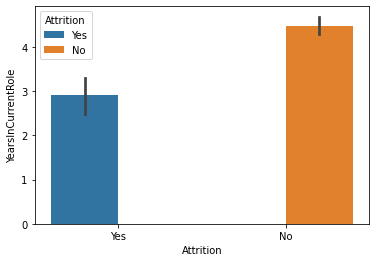

In [43]:
#YearsInCurrentRole
sns.barplot(x='Attrition',y='YearsInCurrentRole',hue='Attrition',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

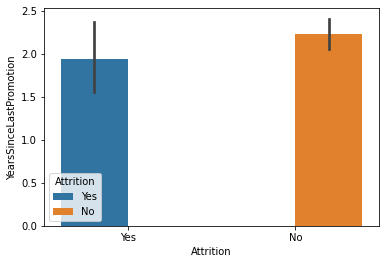

In [44]:
#YearsSinceLastPromotion
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',hue='Attrition',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

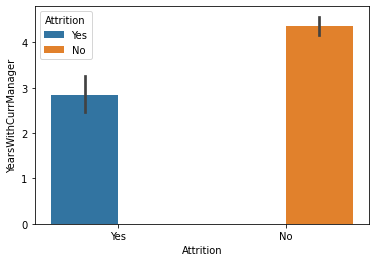

In [45]:
#YearsWithCurrManager
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue='Attrition',data=hr)

In [46]:
#Correlation between variable
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


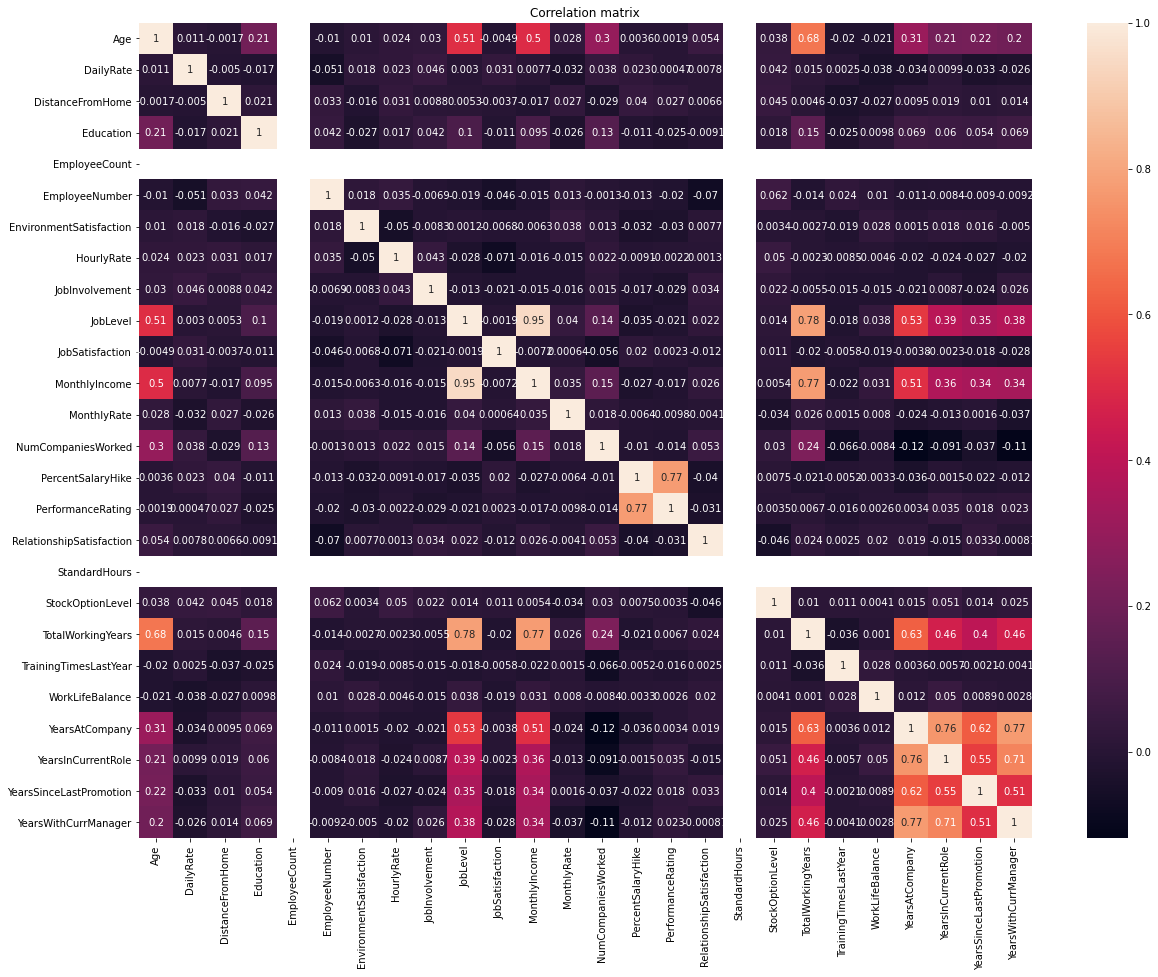

In [47]:
#Visualizing the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(hr.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

In [48]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [49]:
#Deleting unnecessary columns
hr = hr.drop(columns=['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1)

In [50]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [51]:
#converting catagorical data into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in hr.columns:
    if hr[i].dtype == np.number:
        continue
    hr[i] = le.fit_transform(hr[i])

In [52]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


In [53]:
#dividing feature and target variable for modeling the data
x = hr.drop(columns=['Attrition'],axis=1)
y= hr['Attrition']

In [54]:
#data transformation
from sklearn.preprocessing import MinMaxScaler

mms =MinMaxScaler()
x_scaled = mms.fit_transform(x)
x_scaled

array([[0.54761905, 1.        , 0.70508475, ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.5       , 0.12768362, ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 1.        , 0.90960452, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 1.        , 0.0440678 , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.5       , 0.65423729, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 1.        , 0.37966102, ..., 0.16666667, 0.06666667,
        0.11764706]])

In [55]:
#checking for classimbalance problem
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [56]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1233, 1: 237})
Resample dataset shape Counter({1: 1233, 0: 1233})


In [57]:
#finding the best random state
from sklearn.linear_model import LogisticRegression

#metric
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

#models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

maxAccu =0
maxRs =0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_smote,y_smote,test_size =.20,random_state=i)
    LR = LogisticRegression()   
    LR.fit(x_train,y_train)
    predrs=LR.predict(x_test)
    acc = accuracy_score(y_test,predrs)
    if acc>maxAccu :
        maxAccu =acc
        maxRs =i
print("Best accuracy is:",maxAccu,"On Random state:",maxRs)

#LogisticRegression
print ("\n LogisticRegression")
print("\n Accuracy LogisticRegression===>",accuracy_score(y_test,predrs))
print("\n Confusion_mat:",'\n',confusion_matrix(y_test,predrs))
print('\n')
report =classification_report(y_test,predrs)
print(report)




Best accuracy is: 0.7935222672064778 On Random state: 37

 LogisticRegression

 Accuracy LogisticRegression===> 0.7469635627530364

 Confusion_mat: 
 [[183  70]
 [ 55 186]]


              precision    recall  f1-score   support

           0       0.77      0.72      0.75       253
           1       0.73      0.77      0.75       241

    accuracy                           0.75       494
   macro avg       0.75      0.75      0.75       494
weighted avg       0.75      0.75      0.75       494



In [58]:
#cross_validation for LogisticRegression
from sklearn.model_selection import cross_val_score

crv = cross_val_score(LR,x_smote,y_smote,cv=5)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.7267140780645638


In [59]:
#Tunning the parameter using GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,train_size=.25,random_state=55)

clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print("\n Accuracy RandomForest Normal===>",accuracy_score(y_test,y_pred))
print("\n Confusion_mat:",'\n',rf_conf_mat)
print('\n')
report =classification_report(y_test,y_pred)
print(report)

best_params= > {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}

 Accuracy RandomForest Normal===> 0.8140540540540541

 Confusion_mat: 
 [[780 162]
 [182 726]]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       942
           1       0.82      0.80      0.81       908

    accuracy                           0.81      1850
   macro avg       0.81      0.81      0.81      1850
weighted avg       0.81      0.81      0.81      1850



In [60]:
#cross_validation for RandomForest
from sklearn.model_selection import cross_val_score

crv = cross_val_score(clf,x_smote,y_smote,cv=5)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.8666472312783832


In [61]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

pred_df=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_df)*100)
print('\n',confusion_matrix(y_test,pred_df))
print(classification_report(y_test,pred_df))

Accuracy 75.56756756756758

 [[693 249]
 [203 705]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       942
           1       0.74      0.78      0.76       908

    accuracy                           0.76      1850
   macro avg       0.76      0.76      0.76      1850
weighted avg       0.76      0.76      0.76      1850



In [62]:
#cross_validation for DecisionTree

crv = cross_val_score(dt,x_smote,y_smote,cv=5)
print("Cross validation score of DecisionTree Model",crv.mean())

Cross validation score of DecisionTree Model 0.8001330366014898


In [63]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_svc)*100)
print("\n",confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))


Accuracy 62.054054054054056

 [[630 312]
 [390 518]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       942
           1       0.62      0.57      0.60       908

    accuracy                           0.62      1850
   macro avg       0.62      0.62      0.62      1850
weighted avg       0.62      0.62      0.62      1850



In [64]:
#cross_validation for SVC

crv = cross_val_score(svc,x_smote,y_smote,cv=5)
print("Cross validation score of SVC Model",crv.mean())

Cross validation score of SVC Model 0.6305885637795534


#### From the model building i observed one thing that Accuracy score and CV score are 
#### For LogisticRegression Accuracyscore is : 74%          and CV Score:72%
#### for RandomForest Accuracyscore is : 81%          and CV Score:86%
#### For Decision Tree Accuracyscore is : 73%         and CV Score:80%
#### For SVC Accuracyscore is :  62%         and CV Score:63%

#### So,from the result im considering the RandomForestClassifier is best for my model 

In [65]:
#AUC_ROC_CURve
pred_prob_LR = LR.predict_proba(x_test)
pred_prob_dt = dt.predict_proba(x_test)
pred_prob_clf= clf.predict_proba(x_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr_LR, tpr_LR, thresh_LR = roc_curve(y_test, pred_prob_LR[:,1], pos_label=1)
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, pred_prob_clf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score_LR = roc_auc_score(y_test, pred_prob_LR[:,1])
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score_clf = roc_auc_score(y_test, pred_prob_clf[:,1])

print(auc_score_LR, auc_score_dt,auc_score_clf)

0.8066759729509807 0.7560502539352956 0.8952996249427125


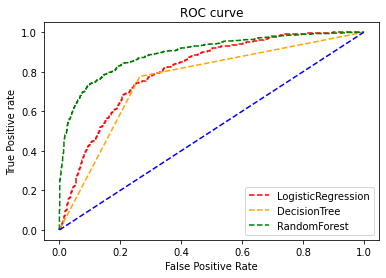

In [66]:
# plot roc curves
plt.plot(fpr_LR, tpr_LR, linestyle='--',color='red', label='LogisticRegression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='DecisionTree')
plt.plot(fpr_clf, tpr_clf, linestyle='--',color='green', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [68]:
#saving the model
import joblib
joblib.dump(clf,"hr_attrition.pkl")

['hr_attrition.pkl']